In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Analysing Applicant, CoApplicant Income and Loan Amount 

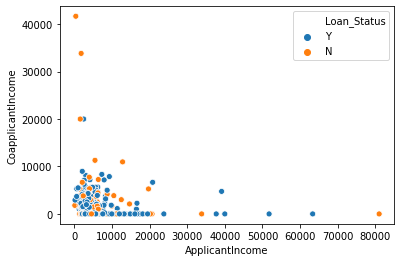

In [7]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data= df)

In [8]:
df[df.ApplicantIncome>80000]  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


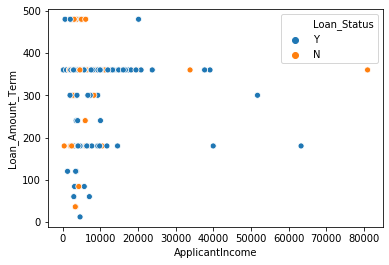

In [9]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Amount_Term',hue='Loan_Status',data= df)

### Analysing Credit_history 

In [10]:
df.Credit_History.isnull().sum()

50

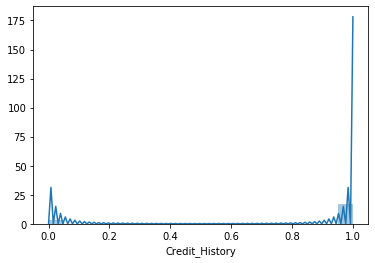

In [11]:
sns.distplot(df[~df.Credit_History.isnull()]['Credit_History'],bins=20)

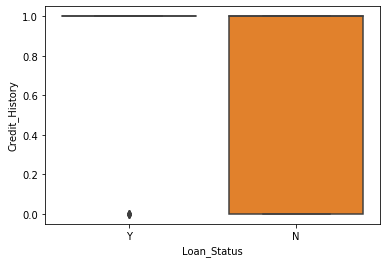

In [12]:
df1 = df[~df.Credit_History.isnull()]
sns.boxplot(x=df1.Loan_Status,y=df1.Credit_History)

In [13]:
df1 = df[df.Loan_Status == 'Y']

In [14]:
df1[(df1.Credit_History < 1) & (df1.Credit_History > 0)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [15]:
df1.Credit_History.value_counts()

1.0    378
0.0      7
Name: Credit_History, dtype: int64

In [16]:
df1[df1.Credit_History == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


In [17]:
df1 = df[df['Credit_History'].isnull()]
df1.Loan_Status.value_counts()

Y    37
N    13
Name: Loan_Status, dtype: int64

In [18]:
df2 = df[df.Credit_History == 1.0]
len(df2)

475

In [19]:
df2.Loan_Status.value_counts()

Y    378
N     97
Name: Loan_Status, dtype: int64

### Analysing Education and Self Employment 

In [20]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [21]:
 df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
df[(df.Self_Employed.isnull()) & (df.Education == 'Graduate')][:15]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
218,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


### Missing data handling 

In [23]:
print(df.LoanAmount.median(),df.LoanAmount.mean())
print(df.Loan_Amount_Term.median(),df.Loan_Amount_Term.mean())
print(df.Credit_History.median())

128.0 146.41216216216216
360.0 342.0
1.0


In [28]:
def missing_data_handler(df):
    df.Gender.fillna('Female',inplace=True)
    df.Dependents.fillna('0',inplace=True)
    df.Dependents = df.Dependents.apply(lambda x: '3' if x=='3+' else x)
    df.Dependents = df.Dependents.astype(int)
    df.Married.fillna('No',inplace=True)  #since dependents for those datapoints is zero
    df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace=True)
    df.LoanAmount.fillna(df.LoanAmount.median(),inplace=True)
    df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace=True)
    df.Credit_History.fillna(df.Credit_History.median(),inplace=True)
    
def missing_data_handler2(df):
    df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
    df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
    df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
    df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
    df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
    df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
    df['Dependents'] = df['Dependents'].str.rstrip('+')
    df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
    df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
    df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
    df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
    df['Dependents'] = df['Dependents'].astype(np.int)

In [29]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
print(len(traindf))
print(len(testdf))

614
367


In [30]:
df = pd.concat([traindf,testdf],sort=False)
df.set_index('Loan_ID',inplace=True)

In [31]:
missing_data_handler2(df)

In [32]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### Label Encoding for Categorical variables 

In [33]:
le = LabelEncoder()

In [34]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [35]:
categorical_cols = categorical_cols[:-1]
print(categorical_cols)

['Property_Area']


In [36]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
traindf = df.iloc[:614]
testdf = df.iloc[614:]

In [38]:
print(len(traindf))
print(len(testdf))

614
367


In [39]:
traindf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,0,5849,0.0,142.51153,360.0,1.0,2,Y
LP001003,1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,N
LP001005,1,1,0,1,1,3000,0.0,66.00000,360.0,1.0,2,Y
LP001006,1,1,0,0,0,2583,2358.0,120.00000,360.0,1.0,2,Y
LP001008,1,0,0,1,0,6000,0.0,141.00000,360.0,1.0,2,Y


In [40]:
xtrain = traindf.iloc[:,:-1]
ytrain = traindf.iloc[:,-1]
xtest = testdf.iloc[:,:-1]

In [41]:
ytrain = le.fit_transform(ytrain)

### Adding extra features 

In [42]:
# xtrain['EMI'] = xtrain.apply(lambda row: (row['LoanAmount']*10000) / row['Loan_Amount_Term'], axis=1)
# xtest['EMI'] = xtest.apply(lambda row: (row['LoanAmount']*10000) / row['Loan_Amount_Term'],axis=1)

xtrain['EMI'] = xtrain.apply(lambda row: row['LoanAmount']*1000*0.007292*pow(1.007292,row['Loan_Amount_Term'])/(pow(1.007292,row['Loan_Amount_Term'])-1), axis=1)
xtest['EMI'] = xtest.apply(lambda row: row['LoanAmount']*1000*0.007292*pow(1.007292,row['Loan_Amount_Term'])/(pow(1.007292,row['Loan_Amount_Term'])-1), axis=1)

In [43]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,EMI
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,0,5849,0.0,142.51153,360.0,1.0,2,1121.179501
LP001003,1,1,1,1,0,4583,1508.0,128.00000,360.0,1.0,0,1007.013087
LP001005,1,1,0,1,1,3000,0.0,66.00000,360.0,1.0,2,519.241123
LP001006,1,1,0,0,0,2583,2358.0,120.00000,360.0,1.0,2,944.074769
LP001008,1,0,0,1,0,6000,0.0,141.00000,360.0,1.0,2,1109.287854


In [44]:
pd.Series(ytrain).value_counts()

1    422
0    192
dtype: int64

### Model 1 - Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import RepeatedStratifiedKFold


In [46]:
clf = RandomForestClassifier(n_estimators=300,random_state=0,class_weight='balanced')

In [47]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_cv_score = cross_val_score(clf, xtrain, ytrain, cv=cv, scoring='accuracy')

In [48]:
rfc_cv_score.mean()

0.7939110070257611

In [49]:
model = clf.fit(xtrain,ytrain)

In [50]:
ypred = model.predict(xtest)

In [70]:
clf.feature_importances_

array([0.01852028, 0.02628693, 0.04372663, 0.02251889, 0.0178746 ,
       0.17316788, 0.10309029, 0.14472839, 0.03260706, 0.22656431,
       0.04938789, 0.14152685])

In [51]:
output = pd.Series(ypred,index=xtest.index)
output = output.reset_index()

In [52]:
output.columns = ['Loan_ID','Loan_Status']

In [53]:
output.Loan_Status.value_counts()

1    296
0     71
Name: Loan_Status, dtype: int64

### Model 2 Xgboost 

In [67]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [78]:
def modelfit(alg, X, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.feature_importances_,index=X.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return alg


Model Report
Accuracy : 0.8632
AUC Score (Train): 0.966670


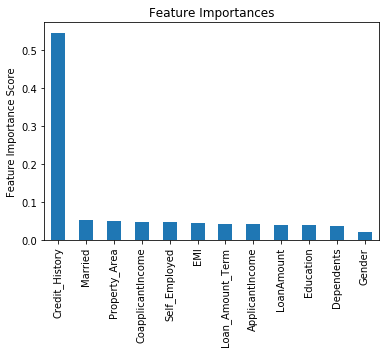

In [79]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model = modelfit(xgb1, xtrain, ytrain)


Model Report
Accuracy : 0.8941
AUC Score (Train): 0.972527


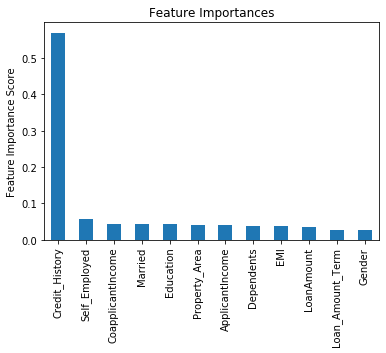

In [96]:
xgb3 = XGBClassifier(learning_rate =0.05, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, objective= 'binary:logistic', scale_pos_weight=1, seed=27)
xmodel2 = modelfit(xgb3, xtrain, ytrain)

In [97]:
ypred = xmodel2.predict(xtest)

In [98]:
output = pd.Series(ypred,index=xtest.index)
output = output.reset_index()
output.columns = ['Loan_ID','Loan_Status']
output.Loan_Status.value_counts()

1    293
0     74
Name: Loan_Status, dtype: int64

### Model 3 - train credit history 1 separate

In [134]:
X = pd.concat([xtrain,pd.Series(ytrain,index=xtrain.index)],axis=1)
cols = xtrain.columns.tolist()
cols.append('Loan_Status')
X.columns = cols
X = X[(X.Credit_History==1)]
xtest1 = xtest[xtest.Credit_History==1]
ytrain1 = X.iloc[:,-1]
xtrain1 = X.iloc[:,:-1]

In [126]:
xtest0 = xtest[xtest.Credit_History!=1]
print("xtest0 = ",len(xtest0),"xtest1 = ",len(xtest1))
clf = RandomForestClassifier(n_estimators=300,random_state=0,class_weight='balanced')
rmodel1 = clf.fit(xtrain1,ytrain1)
ypred1 = rmodel1.predict(xtest1)

xtest0 =  59 xtest1 =  308


In [129]:
ypred0 = [0 for r in range(len(xtest0))]
o1 = pd.Series(ypred1,index=xtest1.index)
o2 = pd.Series(ypred0,index=xtest0.index)
output = pd.concat([o1,o2])

In [131]:
output = output.reset_index()
output.columns = ['Loan_ID','Loan_Status']
output.Loan_Status.value_counts()

1    296
0     71
Name: Loan_Status, dtype: int64

### Write to CSV 

In [132]:
output.Loan_Status = output.Loan_Status.apply(lambda x: 'Y' if x==1 else 'N')

In [133]:
output.to_csv("submission_file.csv",index=False)